In [1]:

import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import pandas as pd
import numpy as np
from tqdm import tqdm

import cv2

Using TensorFlow backend.


In [79]:
!pip install opencv-contrib-python 

     |████████████████████████████████| 59.1MB 1.2MB/s eta 0:00:01     |█████████████▋                  | 25.1MB 1.4MB/s eta 0:00:24     |██████████████████████████▌     | 48.9MB 3.2MB/s eta 0:00:04


## Image reading Preview

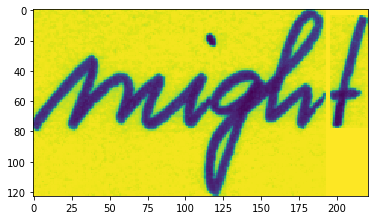

In [3]:
#Use matplotlibs "mpimg.imread" for plotting images
img=mpimg.imread('../text-recognition/train_balanced/might/d01-118-01-00.png')

#Plot image var
imgplot = plt.imshow(img)

In [4]:
from matplotlib import pyplot
from matplotlib.image import imread

In [5]:
df['image'].head()

NameError: name 'df' is not defined

In [19]:

#need to navigate sub directory paths in order for his function to work properly.


# # define location of dataset
# folder = '../text-recognition/train/a01/a01-000u/'
# # plot first few images
# for i in range(9):
#     # define subplot
#     pyplot.subplot(330 + 1 + i)
#     # define filename
#     filename = folder  + text_df['image'][i] + '.png'
#     # load image pixels
#     image = imread(filename)
#     # plot raw pixel data
#     pyplot.imshow(image)
# # show the figure
# pyplot.show()


In [ ]:
# def img_plotter(images):
#     for pics in images:
#         try:
#             img=mpimg.imread('words/a01/a01-000u/'f'{pics}')
#             imgplot = plt.imshow(img)
#         except:
#             print('path not found')
#     return imgplot

## Cleaning Text Data and Creating DataFrame


In [153]:
#access label information from text file
#open file as text object

text_object = open(r'words.txt')

In [9]:
#read the contents of text object

words_text_1 = text_object.readlines()

In [10]:
#slice unwanted headers from text object

words_text = words_text_1[18:]

In [154]:
#preview the results of new list

writing_test = words_text[:100]

In [12]:
#split each section into comma seperated values

comma_sep = []

for x in words_text: 
    comma_sep.append(x.split())
    

In [13]:
#check the results of the split, by checking length and previewing values

print('number of image files is:', len(comma_sep,))

print('\n','first entry:', comma_sep[1],'\n','\n','last entry:', comma_sep[-1])

number of image files is: 115320

 first entry: ['a01-000u-00-01', 'ok', '154', '507', '766', '213', '48', 'NN', 'MOVE'] 
 
 last entry: ['r06-143-04-10', 'ok', '186', '1892', '1453', '36', '66', '?', '?']


## Constructing text_to_df function
 - It was necessary to develop this function as words.txt contains inconsistent shapes

In [6]:
#iterate through split list and select desired values via index
def text_to_df(text_file):
    
    """Function receives text file(string) as input, and will select image.png name, status code, and target name, and return a pandas DataFrame object"""
    
    text_object = open(text_file)
    
    words_text_1 = text_object.readlines()
    
    #slice unwanted headers from text object
    words_text = words_text_1[18:]
    
    comma_separated = []
    #split text values into comma separated values
    
    for x in words_text: 
        comma_separated.append(x.split())
    
    #grab desired values from their indices in the split list
    images = []
    targets = []
    status_code = []

    for target in comma_separated:
        images.append(target[0])
        status_code.append(target[1])
        targets.append(target[-1])
        
    #turn lists into arrays    
    img_array = np.array(images)
    target_array = np.array(targets)
    status_array = np.array(status_code)
    
    #turn arrays into series
    img_series = pd.Series(img_array)
    target_series = pd.Series(target_array)
    status_series = pd.Series(status_array)
    
    #turn series into dataframes
    img_df = pd.DataFrame(img_series)
    target_df = pd.DataFrame(target_series)
    status_df = pd.DataFrame(status_series)
    
    #merge dataframes 
    df_1 = img_df.merge(status_df, left_index=True, right_index=True)
    df = df_1.merge(target_df, left_index = True, right_index = True)
    
    #rename columns
    df.rename(columns={'0_x': 'image', '0_y':'status_code', 0 : 'target'}, inplace=True)
    
    return df

    

In [8]:
text_df = text_to_df('words.txt')

In [9]:
text_df.shape

(115302, 3)

In [10]:
text_df.head()

,image,status_code,target
0,a01-000u-02-05,ok,a
1,a01-000u-02-06,ok,meeting
2,a01-000u-02-07,ok,of
3,a01-000u-02-08,ok,Labour
4,a01-000u-03-00,err,Ps


In [16]:
#convert lists to arrays, and then pandas series

img_array = np.array(images)
target_array = np.array(targets)
status_array = np.array(status_code)

img_series = pd.Series(img_array)
target_series = pd.Series(target_array)
status_series = pd.Series(status_array)


In [17]:
#preview series
status_series

0         ok
1         ok
2         ok
3         ok
4         ok
          ..
115315    ok
115316    ok
115317    ok
115318    ok
115319    ok
Length: 115320, dtype: object

In [18]:
#convert series to dataframe objects
img_df = pd.DataFrame(img_series)
target_df = pd.DataFrame(target_series)
status_df = pd.DataFrame(status_series)

In [19]:
#merge dataframe objects into one main df

df_1 = img_df.merge(status_df, left_index=True, right_index=True)

df = df_1.merge(target_df, left_index = True, right_index = True)

In [20]:
#preview df and rename columns
df.head(2)

,0_x,0_y,0
0,a01-000u-00-00,ok,A
1,a01-000u-00-01,ok,MOVE


In [21]:
df.rename(columns={'0_x': 'image', '0_y':'status_code', 0 : 'target'}, inplace=True)

In [22]:
df

,image,status_code,target
0,a01-000u-00-00,ok,A
1,a01-000u-00-01,ok,MOVE
2,a01-000u-00-02,ok,to
3,a01-000u-00-03,ok,stop
4,a01-000u-00-04,ok,Mr.
...,...,...,...
115315,r06-143-04-06,ok,him
115316,r06-143-04-07,ok,in
115317,r06-143-04-08,ok,the
115318,r06-143-04-09,ok,garden


In [23]:
#create df object for known error image files
status_err = df[df['status_code'] == 'err']

In [24]:
status_err.shape
status_err.head()

,image,status_code,target
22,a01-000u-03-00,err,Ps
23,a01-000u-03-01,err,tomorrow
24,a01-000u-03-02,err,.
25,a01-000u-03-03,err,Mr.
26,a01-000u-03-04,err,Michael


In [25]:
#remove image files with known error val
df.drop(status_err.index, inplace=True)

In [26]:
#inspect shape of new df
df

,image,status_code,target
0,a01-000u-00-00,ok,A
1,a01-000u-00-01,ok,MOVE
2,a01-000u-00-02,ok,to
3,a01-000u-00-03,ok,stop
4,a01-000u-00-04,ok,Mr.
...,...,...,...
115315,r06-143-04-06,ok,him
115316,r06-143-04-07,ok,in
115317,r06-143-04-08,ok,the
115318,r06-143-04-09,ok,garden


In [27]:


df['image'] = df['image'].astype(str) + '.png'


In [28]:
pd.set_option('display.max_rows', None)

In [91]:
value_count = pd.DataFrame(df['target'].value_counts())

In [92]:
value_count.head()

,target
the,4986
",",4376
.,4094
of,2741
to,2255


In [96]:
df.drop(columns = 'value_counts', inplace = True)

In [97]:
df.head()

,image,status_code,target
0,a01-000u-00-00.png,ok,A
1,a01-000u-00-01.png,ok,MOVE
2,a01-000u-00-02.png,ok,to
3,a01-000u-00-03.png,ok,stop
4,a01-000u-00-04.png,ok,Mr.


In [101]:
value_count = value_count.reset_index()

In [161]:
value_count.shape

(12214, 2)

In [104]:
value_count = value_count.rename(columns = {'index': 'target', 'target': 'value_count'})

In [115]:
value_count.to_csv('value_counts.csv')

In [113]:
df.to_csv('images_targets.csv')

In [32]:
top_100.rename(columns = {'index': 'word', 'target': 'count'}, inplace = True)

In [165]:
top_100.head(100)

,index,target
0,the,4986
1,",",4376
2,.,4094
3,of,2741
4,to,2255
5,and,2110
6,a,1950
7,in,1517
8,"""",1061
9,was,970


In [20]:
value_count.shape

NameError: name 'value_count' is not defined

NameError: name 'value_count' is not defined

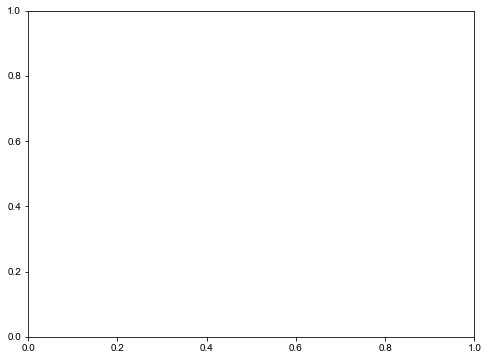

In [21]:
fig, ax = plt.subplots(figsize = (8,6))

sns.set(style = 'darkgrid')

plt.bar('target', 'value_count', data = value_count[:25])
# plt.xlabel('Word', fontsize = 18)
# plt.ylabel('Count', fontsize = 12)
plt.show()


In [35]:
def img_plotter(images):
        img=mpimg.imread('words/a01/a01-000u/'f'{pics}')
        imgplot = plt.imshow(img)
    except:
            print('path not found')
    return imgplot

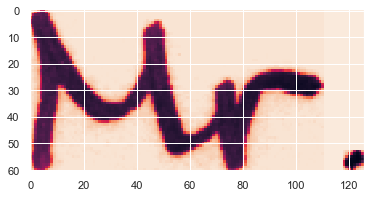

In [36]:
img_plotter(df['image'][:5])

In [37]:
df['image'][:10]

0    a01-000u-00-00.png
1    a01-000u-00-01.png
2    a01-000u-00-02.png
3    a01-000u-00-03.png
4    a01-000u-00-04.png
5    a01-000u-00-05.png
6    a01-000u-00-06.png
7    a01-000u-01-00.png
8    a01-000u-01-01.png
9    a01-000u-01-02.png
Name: image, dtype: object

In [38]:
df.head(15)

,image,status_code,target
0,a01-000u-00-00.png,ok,A
1,a01-000u-00-01.png,ok,MOVE
2,a01-000u-00-02.png,ok,to
3,a01-000u-00-03.png,ok,stop
4,a01-000u-00-04.png,ok,Mr.
5,a01-000u-00-05.png,ok,Gaitskell
6,a01-000u-00-06.png,ok,from
7,a01-000u-01-00.png,ok,nominating
8,a01-000u-01-01.png,ok,any
9,a01-000u-01-02.png,ok,more


In [13]:
#Navigate local file trees utilizing native OS 

# test_array = []
# png_array = []

# for root, dirs, files in os.walk("words"):
#     for name in files:
#         test_array.append(os.path.join(root, name))
#     for name in dirs:
#         test_array.append(os.path.join(root, name))
#     #for new in name:
#         #if '.png' in new:
#            # png_array.append(os.path.join(root, name))

In [ ]:
## Example of grabbing image paths from DF


# Reading the training images
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Images/train/'+train['filename'][i], target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

In [5]:
data_dir_test = '../text-recognition/train_words/'

In [6]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        data_dir_test, 
        target_size=(64, 64),
        #classes =  [str(i) for i in np.arange(76)], 
        batch_size=100)


Found 69741 images belonging to 40 classes.


In [53]:
test_generator.filepaths[:20]

['../text-recognition/words/a01/a01-000u/a01-000u-00-00.png',
 '../text-recognition/words/a01/a01-000u/a01-000u-00-01.png',
 '../text-recognition/words/a01/a01-000u/a01-000u-00-02.png',
 '../text-recognition/words/a01/a01-000u/a01-000u-00-03.png',
 '../text-recognition/words/a01/a01-000u/a01-000u-00-04.png',
 '../text-recognition/words/a01/a01-000u/a01-000u-00-05.png',
 '../text-recognition/words/a01/a01-000u/a01-000u-00-06.png',
 '../text-recognition/words/a01/a01-000u/a01-000u-01-00.png',
 '../text-recognition/words/a01/a01-000u/a01-000u-01-01.png',
 '../text-recognition/words/a01/a01-000u/a01-000u-01-02.png',
 '../text-recognition/words/a01/a01-000u/a01-000u-01-03.png',
 '../text-recognition/words/a01/a01-000u/a01-000u-01-04.png',
 '../text-recognition/words/a01/a01-000u/a01-000u-01-05.png',
 '../text-recognition/words/a01/a01-000u/a01-000u-02-00.png',
 '../text-recognition/words/a01/a01-000u/a01-000u-02-01.png',
 '../text-recognition/words/a01/a01-000u/a01-000u-02-02.png',
 '../tex

In [62]:
test_generator.classes[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [59]:
np.set_printoptions(threshold=np.inf)